# Reto 02 M2: Filtrado de StopWords

In [6]:
# Asignación de StopWords predefinidas para idioma Español
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('spanish')
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kuautli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Creamos un diccionario con el formato
# {Veces_que_aparece_la_palabra: [Palabra1, Palbra2, Palabra3, etc..]}
from os import listdir
Palabras = []
Textos = []

path = "/home/kuautli/Documents/Python-Projects/apuntes-nlp/data/Textos_Stopwords/"

for File in listdir(path):
    # Escribir la RUTA COMPLETA de cada archivo
    with open(path + File, encoding="latin-1") as Text:
        # LEER el texto y pasar todo a minúsculas y reemplazar signos de puntuación 
        texto = Text.read().lower()
        texto = "".join(char for char in texto if (char.isalnum() or char == " "))
        Textos.append(texto)
        # Agregamos al diccionario de palabras, solo las que no sean StopWords
        for palabra in texto.split():
            if (palabra not in stop_words):
                Palabras.append(palabra)
    
# Crear el diccionario con las frecuencias como claves y listas de palabras 
# correspondientes a cada frecuencia como valores
Palabras_unicas = {}
for unica in set(Palabras):
    Frec = Palabras.count(unica)
    # Preguntar si existe el elemento en el diccionario y si no, agregarlo
    if (Palabras_unicas.get(Frec) == None):
        Palabras_unicas.setdefault(Frec, [unica])
    else:
        Palabras_unicas[Frec].append(unica)
print(Palabras_unicas)

{1: ['martin', 'alargó', 'torturarnos', 'conmoción', 'presidente', 'lavarme', 'ataque', 'pulido', 'alcance', 'ésa', 'fajo', 'retórica', 'enfrentarme', 'torre', 'grande', 'buscaba', 'moderado', 'fabricar', 'nostalgia', 'prácticas', 'mortecina', 'silla', 'ministro', 'aun', 'harían', 'dar', 'sabemos', 'mata', 'caminando', 'disecados', 'expresara', 'ojeras', 'matiz', 'éored', 'potter', 'vaciarlo', 'conocí', 'documentar', 'tendió', 'plegaba', 'nuevo', 'conociera', 'aspectos', 'verdoso', 'supervivientes', 'ambiciones', 'marie', 'quejó', 'dodge', 'diecisiete', 'rayos', 'único', 'arena', 'esposa', 'vieron', 'matanza', 'hombros', 'enviándonos', 'admitir', 'cortado', 'once', 'alba', 'salido', 'dejando', 'siglo', 'sonreímos', 'reflejados', 'gemían', 'amplia', 'bastó', 'susto', 'sueltos', 'permanecido', 'sangrante', 'consagrado', 'noventa', 'contener', 'peso', 'delantero', 'cosa', 've', 'dondequiera', 'llevó', 'mapa', 'unía', 'verle', 'retoños', 'evidentemente', 'valar', 'disipó', 'pesar', 'huían'

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(-2.5, 0, '−2.5'),
  Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0')])

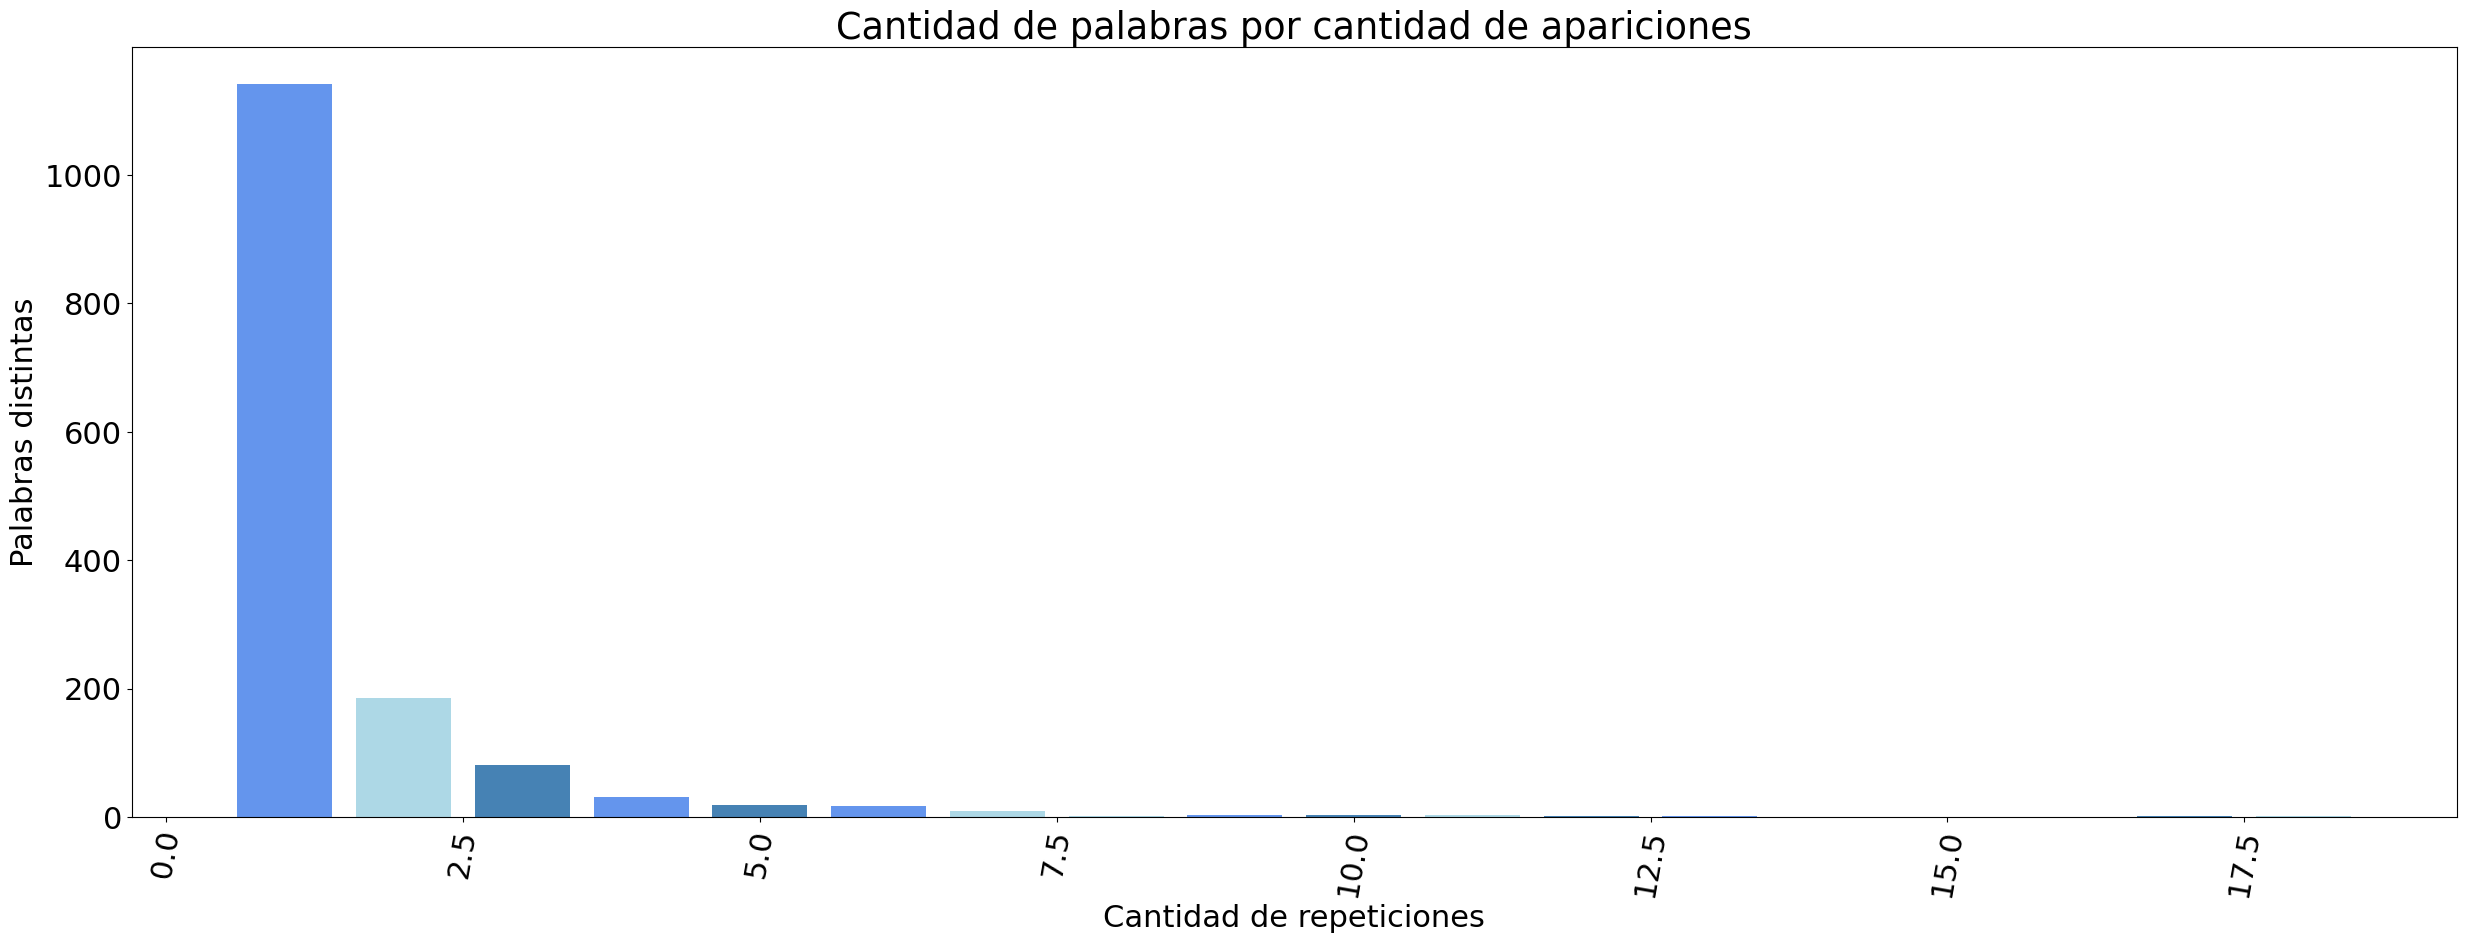

In [8]:
# Ploteo de la gráfica de palabras para cada frecuencia de repetición
# Declarar la librería para plotear y los parámetros de la gráfica
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(30,10))

# Extraer la cantidad de palabras de cada categoría
Frecuencias = []
for Lista in Palabras_unicas.values():
    Frecuencias.append(len(Lista))

# Parámetros de ploteo
plt.bar(Palabras_unicas.keys(), Frecuencias, color=['cornflowerblue', 'lightblue', 'steelblue'])  
plt.ylabel('Palabras distintas')
plt.xlabel('Cantidad de repeticiones')
plt.title('Cantidad de palabras por cantidad de apariciones')
plt.xticks(rotation=80)

In [9]:
# Impresión de las palabras que corresponden a cada frecuencia:
# (Se suma +1 porque el primer índice debe ser 1 y no 0)
for x in range(len(Palabras_unicas.keys())):
    print("\nPalabras que se repiten " + str(x+1) + " veces:")
    if(Palabras_unicas.get(x+1) != None):
        print(set(Palabras_unicas[x+1]))


Palabras que se repiten 1 veces:
{'estribos', 'hospital', 'martin', 'convirtió', 'ocurría', 'revoloteó', 'alargó', 'haces', 'rugía', 'servían', 'profunda', 'hermana', 'seguro', 'partir', 'artículo', 'merry', 'torturarnos', 'imitar', 'conmoción', 'avecina', 'posible', 'renovado', 'presidente', 'lavarme', 'ataque', 'volver', 'ala', 'tras', 'george', 'pulido', 'notoriedad', 'pude', 'cariñoso', 'posiblemente', 'saltó', 'alcance', 'carlisle', 'parece', 'ésa', 'trama', 'fajo', 'retórica', 'cuáles', 'puntos', 'contemplaba', 'volvimos', 'mordor', 'rocas', 'desazón', 'ciento', 'insoportablemente', 'explicarle', 'conocían', 'teoría', 'enceguecedora', 'ignoraba', 'mensaje', 'incesante', 'medida', 'enfrentarme', 'torre', 'grande', 'cubierta', 'extremo', 'encogido', 'sigue', 'buscaba', 'resplandece', 'moderado', 'fabricar', 'reconocido', 'nostalgia', 'fotos', 'sonrió', 'cambiando', 'prácticas', 'tensó', 'lejos', 'elevada', 'derrotado', 'finalmente', 'desayuno', 'solamente', 'pecho', 'finas', 'game

In [10]:
# Agregar palabras adicionales (Personalizadas) al diccionario de StopWords

print("Cantidad de Stopwords:", len(stop_words))

nuevas_StopWords = ['si','no', 'hola', 'adios', 'a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde']
stop_words.extend(nuevas_StopWords)

print("Cantidad nueva de Stopwords:", len(stop_words))

Cantidad de Stopwords: 313
Cantidad nueva de Stopwords: 325


In [11]:
# Método que toma un texto y regresa el texto SIN stopwords
def filtro_stopwords(Texto, stopwords):
    texto_final = ""
    for word in Texto.split():
        if word.lower() not in stopwords:
            texto_final += word + " "
    return texto_final

In [12]:
# Imprimirmos todos los textos sin StopWords
i = 1
for texto in Textos:
    nuevo_texto = filtro_stopwords(texto, stop_words)
    print("Texto" + str(i)+ ":")
    print(nuevo_texto, "\n")
    i += 1

Texto1:
rey inmóvil montado crinblanca contemplaba agonía minas tirith angustia terror paralizado parecía encogido acobardado pronto edad merry sentía abrumado peso insoportable horror duda corazón latía lentamente tiempo parecía haberse detenido incertidumbre llegado demasiado tarde demasiado tarde peor nunca acaso théoden apunto ceder dejar caer vieja cabeza dar media vuelta huir furtivamente esconderse colinas mismo instante resplandor rayo salido entrañas mismas tierra ciudad segundo vieron forma incandescente enceguecedora lejana blanco negro torre mas alta resplandeció aguja rutilante momento después volvió cerrarse oscuridad trueno ensordecedor prolongado llegó campos conjuro aquel ruido atronador figura encorvada rey enderezó súbitamente vez vio montura alto orgulloso irguiéndose estribos gritó voz mas fuerte clara oyera jamás ningún mortal pie pie jinetes théoden momento cruel avecina fuego matanza trepidarán lanzas volarán añicos escudos día espada día rojo llegue alba galopa